# 📶 Búsqueda de la Mejor Señal Wi-Fi con Hill Climbing 🏔️

## 🎯 Problema del Mundo Real

Imagina que estás en tu casa y quieres encontrar el **mejor lugar para trabajar** donde la señal Wi-Fi sea más fuerte.

### 🤔 La Situación:

- 📱 Tienes tu celular en mano mostrando la intensidad de señal
- 🚶 Puedes moverte por la habitación
- 📡 Hay un router en algún lugar (que no conoces)
- 🎯 **Objetivo**: Encontrar el punto con la señal más fuerte

---

## 🧠 ¿Cómo lo resuelve Hill Climbing?

Hill Climbing simula exactamente lo que harías naturalmente:

1. 🎲 **Empiezas en una posición aleatoria** de la habitación
2. 👀 **Miras las barras de Wi-Fi** (evalúas la señal actual)
3. 🚶 **Te mueves** hacia arriba, abajo, izquierda o derecha
4. 📊 **Comparas** la nueva señal con la anterior
5. ✅ **Si mejoró**, te quedas ahí
6. 🔄 **Repites** hasta que ningún movimiento mejore la señal

---

## 📐 Representación Matemática

**Espacio de búsqueda**: Habitación de 10m × 10m (coordenadas x, y)

**Función objetivo**: Intensidad de señal Wi-Fi

$$f(x, y) = -[(x-5)^2 + (y-5)^2] + 100$$

- 📡 **Máximo global**: En (5, 5) donde está el router con señal = 100
- 📉 **Decaimiento**: La señal disminuye con la distancia al router
- 🎲 **Estado inicial**: Posición aleatoria (x, y) en la habitación

¡Vamos a implementarlo! 🚀

---

## 1️⃣ Modelar la Intensidad de Señal Wi-Fi

Primero, creemos una función que simule cómo se comporta la señal Wi-Fi en una habitación.

In [4]:
# Importar bibliotecas necesarias
# Asegurarse de que matplotlib esté instalado (útil si el entorno muestra "Import could not be resolved")

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Función que simula la intensidad de señal Wi-Fi en la habitación
def wifi_signal(x, y):
    """
    Calcula la intensidad de señal Wi-Fi en la posición (x, y).
    
    El router está en (5, 5) con señal máxima de 100.
    La señal decae cuadráticamente con la distancia.
    
    Parámetros:
        x (float): Posición horizontal en metros (0-10)
        y (float): Posición vertical en metros (0-10)
    
    Retorna:
        float: Intensidad de señal Wi-Fi
    """
    # La señal es máxima en (5,5) y decrece con la distancia euclidiana
    return -((x - 5)**2 + (y - 5)**2) + 100

# Crear una malla 2D para visualizar la señal en toda la habitación
x_range = np.linspace(0, 10, 100)
y_range = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = wifi_signal(X, Y)

print("\n" + "="*70)
print("📊 ANÁLISIS DE LA SEÑAL WI-FI")
print("="*70)
print(f"🏠 Dimensiones de la habitación: 10m × 10m")
print(f"📡 Ubicación del router: (5, 5)")
print(f"⭐ Señal máxima: {wifi_signal(5, 5):.0f} (en el router)")
print(f"")
print(f"Ejemplos de señal en diferentes ubicaciones:")
positions = [(0, 0), (2, 2), (5, 5), (8, 3), (10, 10)]
for x, y in positions:
    signal = wifi_signal(x, y)
    distance = np.sqrt((x-5)**2 + (y-5)**2)
    print(f"  • Posición ({x}, {y}): Señal = {signal:.1f} | Distancia al router = {distance:.2f}m")
print("="*70)


📊 ANÁLISIS DE LA SEÑAL WI-FI
🏠 Dimensiones de la habitación: 10m × 10m
📡 Ubicación del router: (5, 5)
⭐ Señal máxima: 100 (en el router)

Ejemplos de señal en diferentes ubicaciones:
  • Posición (0, 0): Señal = 50.0 | Distancia al router = 7.07m
  • Posición (2, 2): Señal = 82.0 | Distancia al router = 4.24m
  • Posición (5, 5): Señal = 100.0 | Distancia al router = 0.00m
  • Posición (8, 3): Señal = 87.0 | Distancia al router = 3.61m
  • Posición (10, 10): Señal = 50.0 | Distancia al router = 7.07m


---

## 2️⃣ Visualizar el Mapa de Señal Wi-Fi

Veamos cómo se distribuye la señal Wi-Fi en toda la habitación.

C:\Users\marco\AppData\Local\Temp\ipykernel_2224\2543409008.py:54: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\2543409008.py:54: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\2543409008.py:54: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\2543409008.py:54: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\2543409008.py:54: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Hill Climbing\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP})

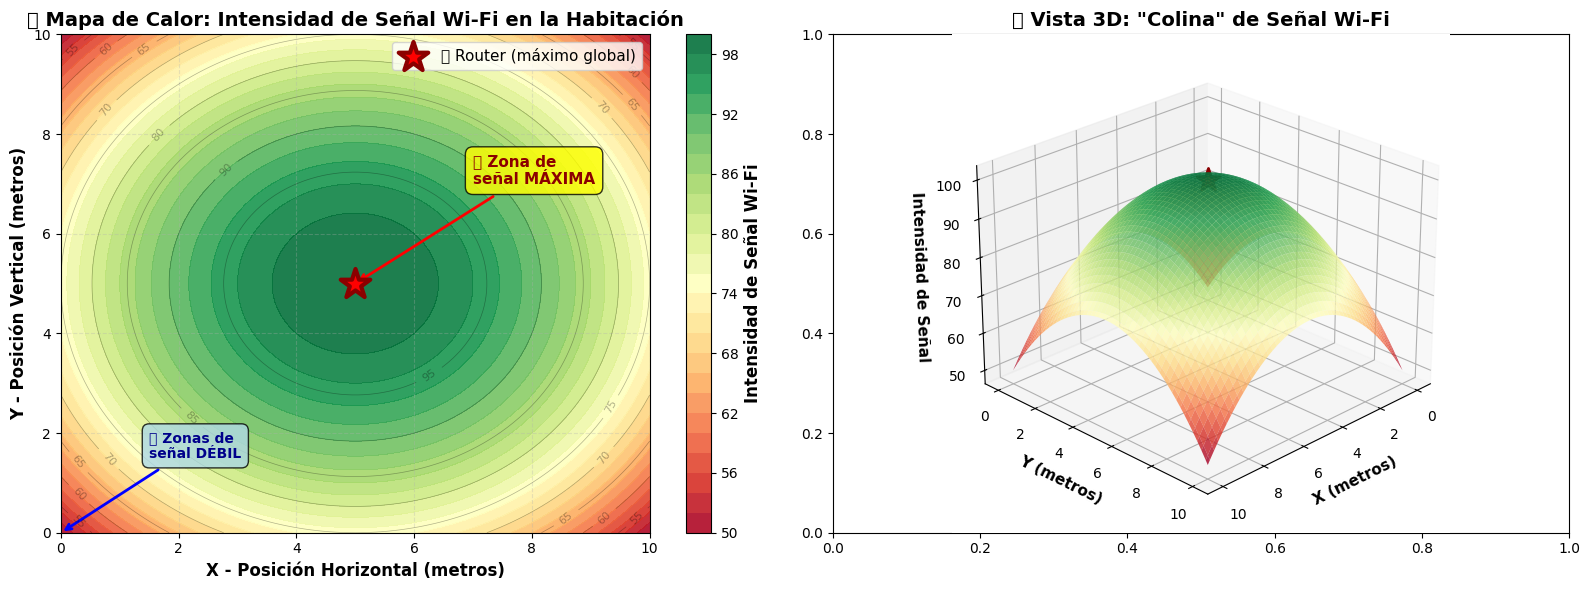


💡 INTERPRETACIÓN:
   • El color VERDE/AMARILLO indica señal FUERTE
   • El color NARANJA/ROJO indica señal DÉBIL
   • La estrella roja marca la ubicación del router
   • La vista 3D muestra una 'montaña' con pico en el router


In [5]:
# Crear visualización 2D con mapa de calor
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ===== Gráfica 1: Mapa de Calor 2D =====
ax1 = axes[0]
contour = ax1.contourf(X, Y, Z, levels=30, cmap='RdYlGn', alpha=0.9)
cbar = plt.colorbar(contour, ax=ax1)
cbar.set_label('Intensidad de Señal Wi-Fi', fontsize=12, fontweight='bold')

# Marcar el router
ax1.scatter([5], [5], color='red', s=500, marker='*', 
           edgecolors='darkred', linewidths=3, 
           label='📡 Router (máximo global)', zorder=5)

# Líneas de contorno
contour_lines = ax1.contour(X, Y, Z, levels=10, colors='black', alpha=0.3, linewidths=0.5)
ax1.clabel(contour_lines, inline=True, fontsize=8, fmt='%.0f')

ax1.set_xlabel('X - Posición Horizontal (metros)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Y - Posición Vertical (metros)', fontsize=12, fontweight='bold')
ax1.set_title('🗺️ Mapa de Calor: Intensidad de Señal Wi-Fi en la Habitación', 
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)

# Anotaciones
ax1.annotate('🔴 Zona de\nseñal MÁXIMA', xy=(5, 5), xytext=(7, 7),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

ax1.annotate('🔵 Zonas de\nseñal DÉBIL', xy=(0, 0), xytext=(1.5, 1.5),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2),
            fontsize=10, fontweight='bold', color='darkblue',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

# ===== Gráfica 2: Vista 3D =====
ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X, Y, Z, cmap='RdYlGn', alpha=0.8, 
                        edgecolor='none', antialiased=True)

# Marcar el router en 3D
ax2.scatter([5], [5], [100], color='red', s=300, marker='*', 
           edgecolors='darkred', linewidths=2, label='Router')

ax2.set_xlabel('X (metros)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Y (metros)', fontsize=11, fontweight='bold')
ax2.set_zlabel('Intensidad de Señal', fontsize=11, fontweight='bold')
ax2.set_title('📈 Vista 3D: "Colina" de Señal Wi-Fi', fontsize=14, fontweight='bold')
ax2.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print("   • El color VERDE/AMARILLO indica señal FUERTE")
print("   • El color NARANJA/ROJO indica señal DÉBIL")
print("   • La estrella roja marca la ubicación del router")
print("   • La vista 3D muestra una 'montaña' con pico en el router")

---

## 3️⃣ Implementar Hill Climbing para Búsqueda Wi-Fi

Ahora implementemos el algoritmo que "camina" por la habitación buscando la mejor señal.

In [6]:
def hill_climbing_wifi(max_steps=100, seed=None):
    """
    Algoritmo Hill Climbing para encontrar la mejor señal Wi-Fi.
    
    Parámetros:
        max_steps (int): Número máximo de movimientos permitidos
        seed (int): Semilla para reproducibilidad (opcional)
    
    Retorna:
        tuple: (path, signals) donde path es lista de posiciones (x,y) 
               y signals es lista de intensidades de señal
    """
    if seed is not None:
        random.seed(seed)
    
    # Estado inicial: posición aleatoria en la habitación
    x = random.randint(0, 10)
    y = random.randint(0, 10)
    
    # Guardar el camino recorrido
    path = [(x, y)]
    signals = [wifi_signal(x, y)]
    
    print(f"\n🎲 Posición inicial: ({x}, {y})")
    print(f"📶 Señal inicial: {wifi_signal(x, y):.2f}\n")
    print("🚶 Comenzando búsqueda...\n")
    
    for step in range(max_steps):
        current_signal = wifi_signal(x, y)
        
        # Definir movimientos posibles: arriba, abajo, izquierda, derecha
        moves = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        
        # Generar vecinos válidos (dentro de la habitación 0-10)
        neighbors = []
        for dx, dy in moves:
            new_x = x + dx
            new_y = y + dy
            # Verificar que el vecino esté dentro de los límites
            if 0 <= new_x <= 10 and 0 <= new_y <= 10:
                neighbors.append((new_x, new_y))
        
        # Evaluar todos los vecinos y elegir el mejor
        best_neighbor = max(neighbors, key=lambda pos: wifi_signal(pos[0], pos[1]))
        best_signal = wifi_signal(best_neighbor[0], best_neighbor[1])
        
        # Si el mejor vecino mejora la señal actual, moverse
        if best_signal > current_signal:
            x, y = best_neighbor
            path.append((x, y))
            signals.append(best_signal)
            
            if step < 10 or step % 5 == 0:  # Mostrar primeros pasos y cada 5
                improvement = best_signal - current_signal
                print(f"   Paso {step+1}: Moviendo a ({x}, {y}) | "
                      f"Señal = {best_signal:.2f} | +{improvement:.2f}")
        else:
            # No hay mejora posible, hemos llegado al máximo local
            print(f"\n🛑 No hay mejora posible. Algoritmo detenido en paso {step+1}")
            break
    
    return path, signals

print("="*70)
print("🚀 EJECUTANDO HILL CLIMBING PARA BÚSQUEDA DE WI-FI")
print("="*70)

# Ejecutar el algoritmo
path, signals = hill_climbing_wifi(max_steps=100, seed=42)

# Mostrar resultados
print("\n" + "="*70)
print("📊 RESULTADOS FINALES")
print("="*70)
print(f"🎲 Posición inicial: {path[0]}")
print(f"🏁 Posición final: {path[-1]}")
print(f"📶 Señal inicial: {signals[0]:.2f}")
print(f"⭐ Señal final: {signals[-1]:.2f}")
print(f"📈 Mejora total: {signals[-1] - signals[0]:.2f}")
print(f"🚶 Pasos realizados: {len(path) - 1}")
print(f"📏 Distancia recorrida: {len(path) - 1} metros")

# Distancia al router óptimo
final_x, final_y = path[-1]
distance_to_router = np.sqrt((final_x - 5)**2 + (final_y - 5)**2)
print(f"📡 Distancia al router: {distance_to_router:.2f} metros")

if distance_to_router == 0:
    print(f"\n🎉 ¡ÉXITO TOTAL! Encontraste el router exacto en (5, 5)")
elif distance_to_router < 1:
    print(f"\n✅ ¡Excelente! Muy cerca del router (distancia: {distance_to_router:.2f}m)")
elif distance_to_router < 3:
    print(f"\n✅ ¡Bien! Estás cerca del router (distancia: {distance_to_router:.2f}m)")
else:
    print(f"\n⚠️  Quedaste en un máximo local (distancia: {distance_to_router:.2f}m)")

print("="*70)

🚀 EJECUTANDO HILL CLIMBING PARA BÚSQUEDA DE WI-FI

🎲 Posición inicial: (10, 1)
📶 Señal inicial: 59.00

🚶 Comenzando búsqueda...

   Paso 1: Moviendo a (9, 1) | Señal = 68.00 | +9.00
   Paso 2: Moviendo a (8, 1) | Señal = 75.00 | +7.00
   Paso 3: Moviendo a (8, 2) | Señal = 82.00 | +7.00
   Paso 4: Moviendo a (7, 2) | Señal = 87.00 | +5.00
   Paso 5: Moviendo a (7, 3) | Señal = 92.00 | +5.00
   Paso 6: Moviendo a (6, 3) | Señal = 95.00 | +3.00
   Paso 7: Moviendo a (6, 4) | Señal = 98.00 | +3.00
   Paso 8: Moviendo a (5, 4) | Señal = 99.00 | +1.00
   Paso 9: Moviendo a (5, 5) | Señal = 100.00 | +1.00

🛑 No hay mejora posible. Algoritmo detenido en paso 10

📊 RESULTADOS FINALES
🎲 Posición inicial: (10, 1)
🏁 Posición final: (5, 5)
📶 Señal inicial: 59.00
⭐ Señal final: 100.00
📈 Mejora total: 41.00
🚶 Pasos realizados: 9
📏 Distancia recorrida: 9 metros
📡 Distancia al router: 0.00 metros

🎉 ¡ÉXITO TOTAL! Encontraste el router exacto en (5, 5)


---

## 4️⃣ Visualizar el Camino de Búsqueda

Veamos gráficamente cómo el algoritmo se movió por la habitación.

C:\Users\marco\AppData\Local\Temp\ipykernel_2224\3022430264.py:94: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\3022430264.py:94: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\3022430264.py:94: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\3022430264.py:94: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\3022430264.py:94: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Hill Climbing\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127922 (\N{GAME DIE}) missing fro

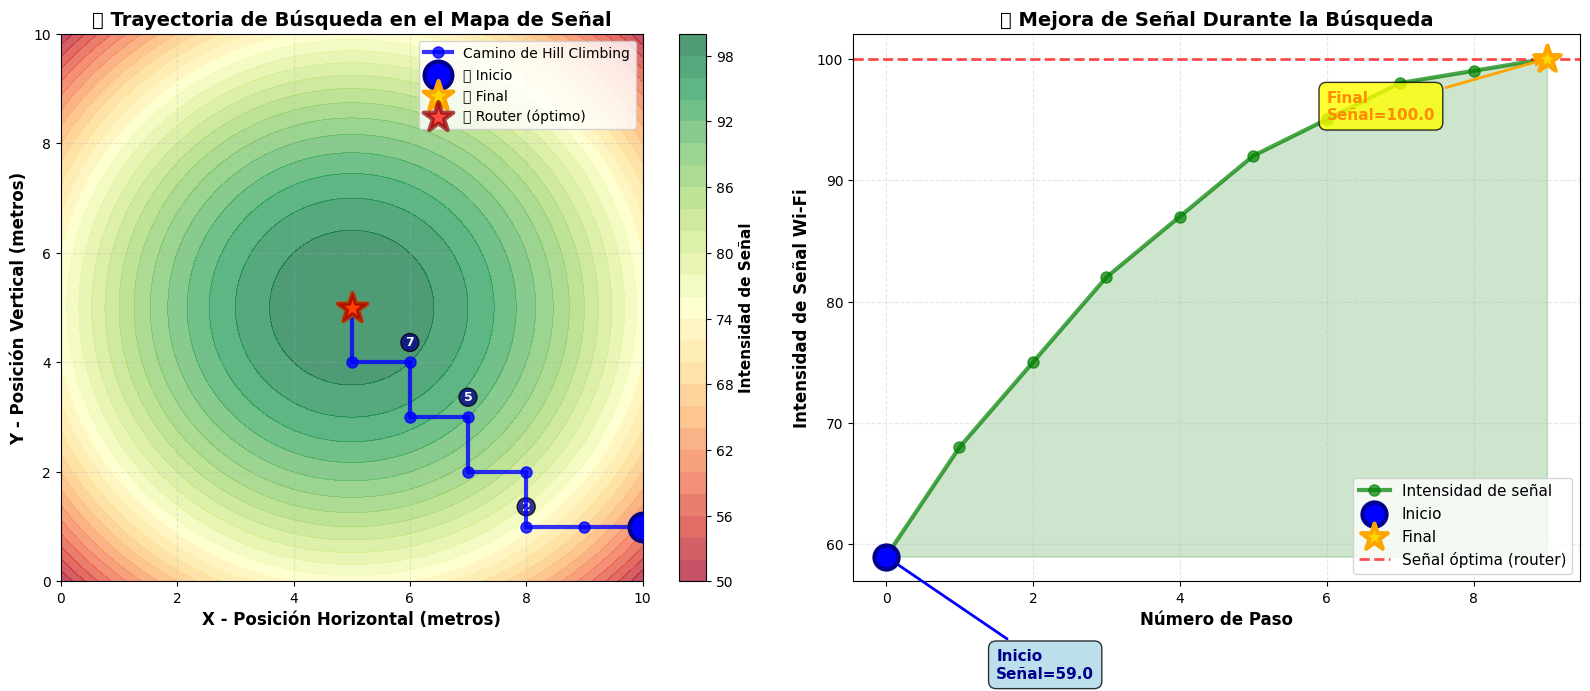


💡 INTERPRETACIÓN:
   Izquierda: El camino azul muestra cómo te moviste por la habitación
   Derecha: La gráfica muestra cómo la señal mejoró en cada paso
   • Cada paso del algoritmo siempre mejoró o mantuvo la señal
   • El algoritmo se detuvo cuando ningún movimiento mejoró la señal


In [7]:
# Crear visualización del camino
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# ===== Gráfica 1: Camino en el mapa de calor =====
ax1 = axes[0]

# Mapa de calor de la señal
contour = ax1.contourf(X, Y, Z, levels=30, cmap='RdYlGn', alpha=0.7)
cbar = plt.colorbar(contour, ax=ax1)
cbar.set_label('Intensidad de Señal', fontsize=11, fontweight='bold')

# Dibujar el camino recorrido
path_x, path_y = zip(*path)
ax1.plot(path_x, path_y, 'bo-', linewidth=3, markersize=8, 
        label='Camino de Hill Climbing', zorder=4, alpha=0.8)

# Marcar inicio
ax1.scatter([path_x[0]], [path_y[0]], color='blue', s=400, 
           marker='o', edgecolors='darkblue', linewidths=3, 
           label='🎲 Inicio', zorder=5)

# Marcar final
ax1.scatter([path_x[-1]], [path_y[-1]], color='gold', s=500, 
           marker='*', edgecolors='orange', linewidths=3, 
           label='🏁 Final', zorder=5)

# Marcar router
ax1.scatter([5], [5], color='red', s=500, marker='*', 
           edgecolors='darkred', linewidths=3, 
           label='📡 Router (óptimo)', zorder=5, alpha=0.7)

# Numerar algunos pasos
step_indices = [0, len(path)//4, len(path)//2, 3*len(path)//4, len(path)-1]
for idx in step_indices:
    if 0 < idx < len(path) - 1:
        ax1.text(path_x[idx], path_y[idx] + 0.3, f'{idx}', 
                fontsize=9, ha='center', fontweight='bold', 
                color='white', 
                bbox=dict(boxstyle='circle,pad=0.2', 
                         facecolor='darkblue', alpha=0.8))

ax1.set_xlabel('X - Posición Horizontal (metros)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Y - Posición Vertical (metros)', fontsize=12, fontweight='bold')
ax1.set_title('🗺️ Trayectoria de Búsqueda en el Mapa de Señal', 
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)

# ===== Gráfica 2: Evolución de la señal =====
ax2 = axes[1]

steps = list(range(len(signals)))
ax2.plot(steps, signals, 'go-', linewidth=3, markersize=8, 
        label='Intensidad de señal', alpha=0.7)

# Marcar inicio y final
ax2.scatter([0], [signals[0]], color='blue', s=300, 
           marker='o', edgecolors='darkblue', linewidths=3, 
           label='Inicio', zorder=5)
ax2.scatter([len(signals)-1], [signals[-1]], color='gold', s=400, 
           marker='*', edgecolors='orange', linewidths=3, 
           label='Final', zorder=5)

# Línea de señal óptima
ax2.axhline(y=100, color='red', linestyle='--', linewidth=2, 
           alpha=0.7, label='Señal óptima (router)')

# Sombrear mejora
ax2.fill_between(steps, signals[0], signals, alpha=0.2, color='green')

ax2.set_xlabel('Número de Paso', fontsize=12, fontweight='bold')
ax2.set_ylabel('Intensidad de Señal Wi-Fi', fontsize=12, fontweight='bold')
ax2.set_title('📈 Mejora de Señal Durante la Búsqueda', 
             fontsize=14, fontweight='bold')
ax2.legend(fontsize=11, loc='lower right')
ax2.grid(True, alpha=0.3, linestyle='--')

# Anotaciones
ax2.annotate(f'Inicio\nSeñal={signals[0]:.1f}', 
            xy=(0, signals[0]), xytext=(len(steps)*0.15, signals[0]-10),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2),
            fontsize=11, fontweight='bold', color='darkblue',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

ax2.annotate(f'Final\nSeñal={signals[-1]:.1f}', 
            xy=(len(signals)-1, signals[-1]), 
            xytext=(len(steps)*0.6, signals[-1]-5),
            arrowprops=dict(arrowstyle='->', color='orange', lw=2),
            fontsize=11, fontweight='bold', color='darkorange',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print("   Izquierda: El camino azul muestra cómo te moviste por la habitación")
print("   Derecha: La gráfica muestra cómo la señal mejoró en cada paso")
print("   • Cada paso del algoritmo siempre mejoró o mantuvo la señal")
print("   • El algoritmo se detuvo cuando ningún movimiento mejoró la señal")

---

## 5️⃣ Experimento: Múltiples Búsquedas desde Diferentes Posiciones

Ejecutemos el algoritmo desde varias posiciones iniciales para ver cómo se comporta.

In [8]:
# Experimento: Múltiples ejecuciones
num_ejecuciones = 6
resultados = []

print("\n" + "="*75)
print(f"🔬 EXPERIMENTO: {num_ejecuciones} BÚSQUEDAS DESDE POSICIONES DIFERENTES")
print("="*75)
print("\n🎲 Ejecutando Hill Climbing desde diferentes esquinas y posiciones...\n")

for i in range(num_ejecuciones):
    # Ejecutar con semilla diferente
    path_i, signals_i = hill_climbing_wifi(max_steps=100, seed=i*10)
    
    resultados.append({
        'inicio': path_i[0],
        'final': path_i[-1],
        'señal_inicial': signals_i[0],
        'señal_final': signals_i[-1],
        'pasos': len(path_i) - 1,
        'path': path_i,
        'signals': signals_i
    })
    
    mejora = signals_i[-1] - signals_i[0]
    print(f"Búsqueda {i+1}: {path_i[0]} → {path_i[-1]} | "
          f"Señal: {signals_i[0]:.1f} → {signals_i[-1]:.1f} | "
          f"Mejora: +{mejora:.1f} | Pasos: {len(path_i)-1}")

print("\n" + "="*75)
print("📊 ANÁLISIS COMPARATIVO")
print("="*75)

# Estadísticas
senales_finales = [r['señal_final'] for r in resultados]
pasos_totales = [r['pasos'] for r in resultados]
mejoras = [r['señal_final'] - r['señal_inicial'] for r in resultados]

print(f"\n📈 Estadísticas de {num_ejecuciones} ejecuciones:")
print(f"   • Señal final promedio: {np.mean(senales_finales):.2f}")
print(f"   • Mejor señal alcanzada: {max(senales_finales):.2f}")
print(f"   • Peor señal alcanzada: {min(senales_finales):.2f}")
print(f"   • Pasos promedio: {np.mean(pasos_totales):.1f}")
print(f"   • Mejora promedio: +{np.mean(mejoras):.2f}")

# Verificar cuántas llegaron al router
en_router = sum(1 for r in resultados if r['final'] == (5, 5))
cerca_router = sum(1 for r in resultados 
                   if np.sqrt((r['final'][0]-5)**2 + (r['final'][1]-5)**2) <= 1)

print(f"\n🎯 Precisión:")
print(f"   • Búsquedas que llegaron AL router (5,5): {en_router}/{num_ejecuciones}")
print(f"   • Búsquedas a ≤1m del router: {cerca_router}/{num_ejecuciones}")

if en_router == num_ejecuciones:
    print(f"\n🎉 ¡PERFECTO! Todas las búsquedas encontraron el router exacto")
elif cerca_router == num_ejecuciones:
    print(f"\n✅ ¡Excelente! Todas las búsquedas quedaron muy cerca del router")
else:
    print(f"\n✅ La mayoría de búsquedas fueron exitosas")

print("="*75)


🔬 EXPERIMENTO: 6 BÚSQUEDAS DESDE POSICIONES DIFERENTES

🎲 Ejecutando Hill Climbing desde diferentes esquinas y posiciones...


🎲 Posición inicial: (6, 6)
📶 Señal inicial: 98.00

🚶 Comenzando búsqueda...

   Paso 1: Moviendo a (5, 6) | Señal = 99.00 | +1.00
   Paso 2: Moviendo a (5, 5) | Señal = 100.00 | +1.00

🛑 No hay mejora posible. Algoritmo detenido en paso 3
Búsqueda 1: (6, 6) → (5, 5) | Señal: 98.0 → 100.0 | Mejora: +2.0 | Pasos: 2

🎲 Posición inicial: (9, 0)
📶 Señal inicial: 59.00

🚶 Comenzando búsqueda...

   Paso 1: Moviendo a (9, 1) | Señal = 68.00 | +9.00
   Paso 2: Moviendo a (8, 1) | Señal = 75.00 | +7.00
   Paso 3: Moviendo a (8, 2) | Señal = 82.00 | +7.00
   Paso 4: Moviendo a (7, 2) | Señal = 87.00 | +5.00
   Paso 5: Moviendo a (7, 3) | Señal = 92.00 | +5.00
   Paso 6: Moviendo a (6, 3) | Señal = 95.00 | +3.00
   Paso 7: Moviendo a (6, 4) | Señal = 98.00 | +3.00
   Paso 8: Moviendo a (5, 4) | Señal = 99.00 | +1.00
   Paso 9: Moviendo a (5, 5) | Señal = 100.00 | +1.00



C:\Users\marco\AppData\Local\Temp\ipykernel_2224\3377000124.py:43: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\3377000124.py:43: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Hill Climbing\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\marco\OneDrive\Desktop\Hill Climbing\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


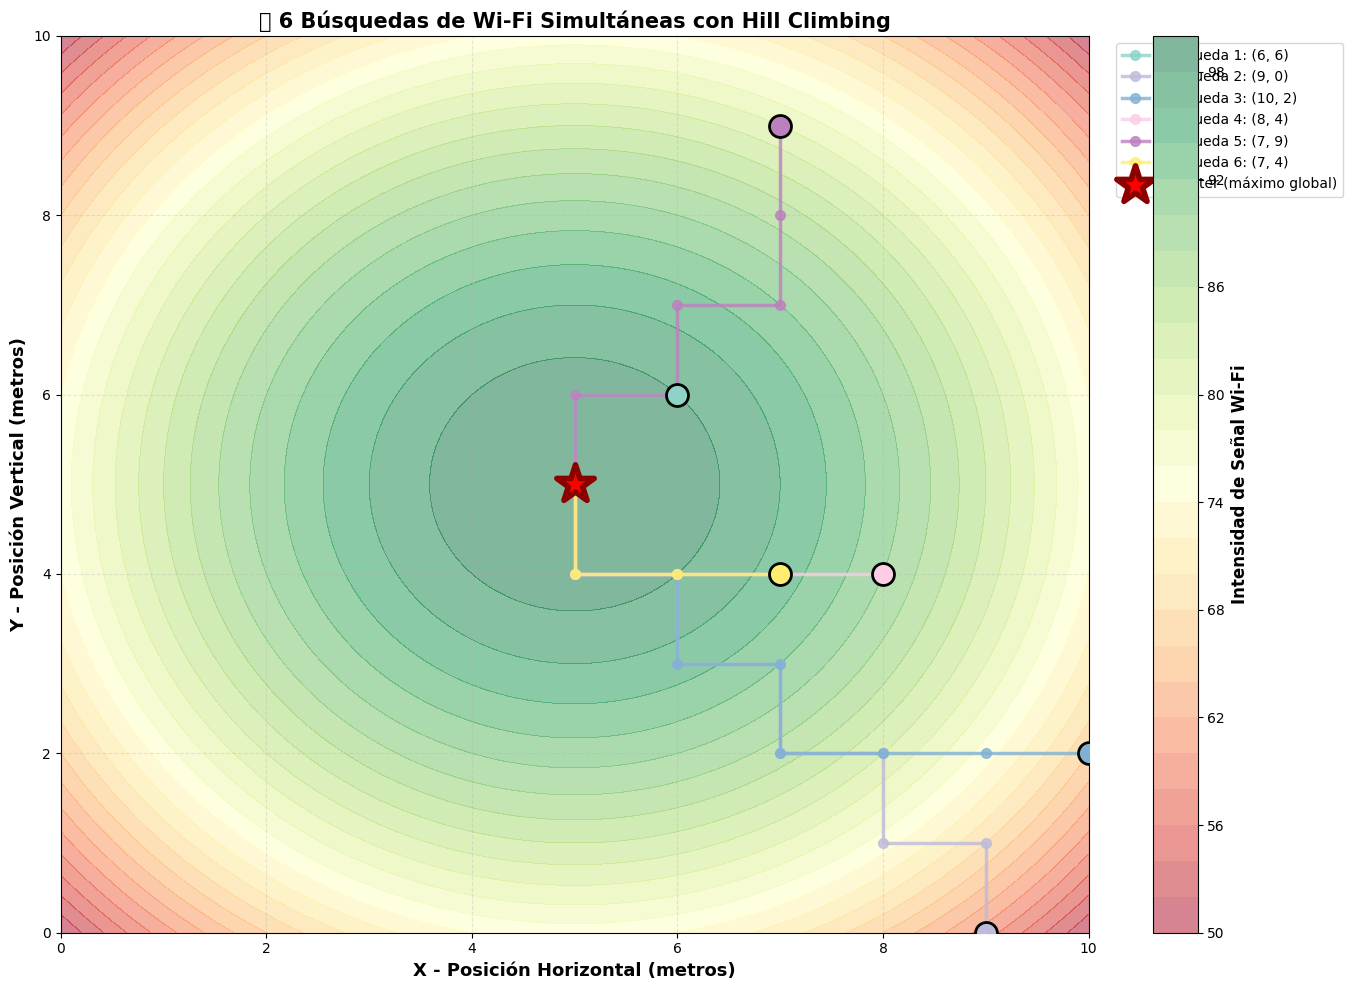


💡 OBSERVACIONES:
   • Cada color representa una búsqueda diferente
   • Los números en los círculos indican el punto de inicio
   • Todas las trayectorias se dirigen hacia zonas de mejor señal
   • La estrella roja es el objetivo (router)


In [9]:
# Visualizar todas las búsquedas juntas
plt.figure(figsize=(14, 10))

# Mapa de calor base
contour = plt.contourf(X, Y, Z, levels=30, cmap='RdYlGn', alpha=0.5)
cbar = plt.colorbar(contour)
cbar.set_label('Intensidad de Señal Wi-Fi', fontsize=12, fontweight='bold')

# Colores para cada búsqueda
colores = plt.cm.Set3(np.linspace(0, 1, num_ejecuciones))

# Dibujar cada camino
for i, resultado in enumerate(resultados):
    path_x, path_y = zip(*resultado['path'])
    
    # Camino
    plt.plot(path_x, path_y, 'o-', color=colores[i], 
            linewidth=2.5, markersize=7, alpha=0.8, 
            label=f"Búsqueda {i+1}: {resultado['inicio']}")
    
    # Marcar inicio
    plt.scatter([path_x[0]], [path_y[0]], color=colores[i], 
               s=250, marker='o', edgecolors='black', linewidths=2, zorder=5)
    
    # Número de búsqueda en el inicio
    plt.text(path_x[0], path_y[0], f'{i+1}', fontsize=10, 
            ha='center', va='center', fontweight='bold', color='white')

# Marcar el router
plt.scatter([5], [5], color='red', s=800, marker='*', 
           edgecolors='darkred', linewidths=4, 
           label='📡 Router (máximo global)', zorder=10)

plt.xlabel('X - Posición Horizontal (metros)', fontsize=13, fontweight='bold')
plt.ylabel('Y - Posición Vertical (metros)', fontsize=13, fontweight='bold')
plt.title(f'🌈 {num_ejecuciones} Búsquedas de Wi-Fi Simultáneas con Hill Climbing', 
         fontsize=15, fontweight='bold')
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

print("\n💡 OBSERVACIONES:")
print("   • Cada color representa una búsqueda diferente")
print("   • Los números en los círculos indican el punto de inicio")
print("   • Todas las trayectorias se dirigen hacia zonas de mejor señal")
print("   • La estrella roja es el objetivo (router)")

---

## 6️⃣ Comparación: ¿Qué pasa si buscas aleatoriamente?

Comparemos Hill Climbing con una búsqueda aleatoria para ver la diferencia.

In [10]:
def busqueda_aleatoria(max_steps=50, seed=42):
    """
    Búsqueda aleatoria (sin inteligencia) para comparación.
    """
    random.seed(seed)
    
    # Posición inicial aleatoria
    x = random.randint(0, 10)
    y = random.randint(0, 10)
    
    path = [(x, y)]
    signals = [wifi_signal(x, y)]
    
    for _ in range(max_steps):
        # Moverse ALEATORIAMENTE
        moves = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        dx, dy = random.choice(moves)
        
        new_x = max(0, min(10, x + dx))
        new_y = max(0, min(10, y + dy))
        
        x, y = new_x, new_y
        path.append((x, y))
        signals.append(wifi_signal(x, y))
    
    return path, signals

# Ejecutar ambos métodos
print("\n" + "="*75)
print("⚔️ COMPARACIÓN: HILL CLIMBING vs BÚSQUEDA ALEATORIA")
print("="*75)

# Hill Climbing
path_hc, signals_hc = hill_climbing_wifi(max_steps=50, seed=99)

# Búsqueda Aleatoria
print("\n🎲 Ejecutando búsqueda ALEATORIA (sin inteligencia)...\n")
path_random, signals_random = busqueda_aleatoria(max_steps=50, seed=99)

# Comparar resultados
print("\n" + "="*75)
print("📊 COMPARACIÓN DE RESULTADOS")
print("="*75)
print(f"\n{'Métrica':<30} {'Hill Climbing':<20} {'Búsqueda Aleatoria':<20}")
print("-" * 75)
print(f"{'Señal inicial':<30} {signals_hc[0]:<20.2f} {signals_random[0]:<20.2f}")
print(f"{'Señal final':<30} {signals_hc[-1]:<20.2f} {signals_random[-1]:<20.2f}")
print(f"{'Mejora':<30} {signals_hc[-1]-signals_hc[0]:<20.2f} {signals_random[-1]-signals_random[0]:<20.2f}")
print(f"{'Pasos realizados':<30} {len(path_hc)-1:<20} {len(path_random)-1:<20}")
print(f"{'Posición final':<30} {str(path_hc[-1]):<20} {str(path_random[-1]):<20}")

# Distancias al router
dist_hc = np.sqrt((path_hc[-1][0]-5)**2 + (path_hc[-1][1]-5)**2)
dist_random = np.sqrt((path_random[-1][0]-5)**2 + (path_random[-1][1]-5)**2)
print(f"{'Distancia al router (m)':<30} {dist_hc:<20.2f} {dist_random:<20.2f}")

print("\n" + "="*75)

if signals_hc[-1] > signals_random[-1]:
    ventaja = signals_hc[-1] - signals_random[-1]
    print(f"\n🏆 GANADOR: HILL CLIMBING")
    print(f"   Ventaja: {ventaja:.2f} puntos de señal superior")
else:
    print(f"\n🎲 La búsqueda aleatoria ganó esta vez (¡pero fue suerte!)")


⚔️ COMPARACIÓN: HILL CLIMBING vs BÚSQUEDA ALEATORIA

🎲 Posición inicial: (6, 6)
📶 Señal inicial: 98.00

🚶 Comenzando búsqueda...

   Paso 1: Moviendo a (5, 6) | Señal = 99.00 | +1.00
   Paso 2: Moviendo a (5, 5) | Señal = 100.00 | +1.00

🛑 No hay mejora posible. Algoritmo detenido en paso 3

🎲 Ejecutando búsqueda ALEATORIA (sin inteligencia)...


📊 COMPARACIÓN DE RESULTADOS

Métrica                        Hill Climbing        Búsqueda Aleatoria  
---------------------------------------------------------------------------
Señal inicial                  98.00                98.00               
Señal final                    100.00               71.00               
Mejora                         2.00                 -27.00              
Pasos realizados               2                    50                  
Posición final                 (5, 5)               (3, 0)              
Distancia al router (m)        0.00                 5.39                


🏆 GANADOR: HILL CLIMBING
   Vent

C:\Users\marco\AppData\Local\Temp\ipykernel_2224\2903482500.py:42: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marco\AppData\Local\Temp\ipykernel_2224\2903482500.py:42: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Hill Climbing\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


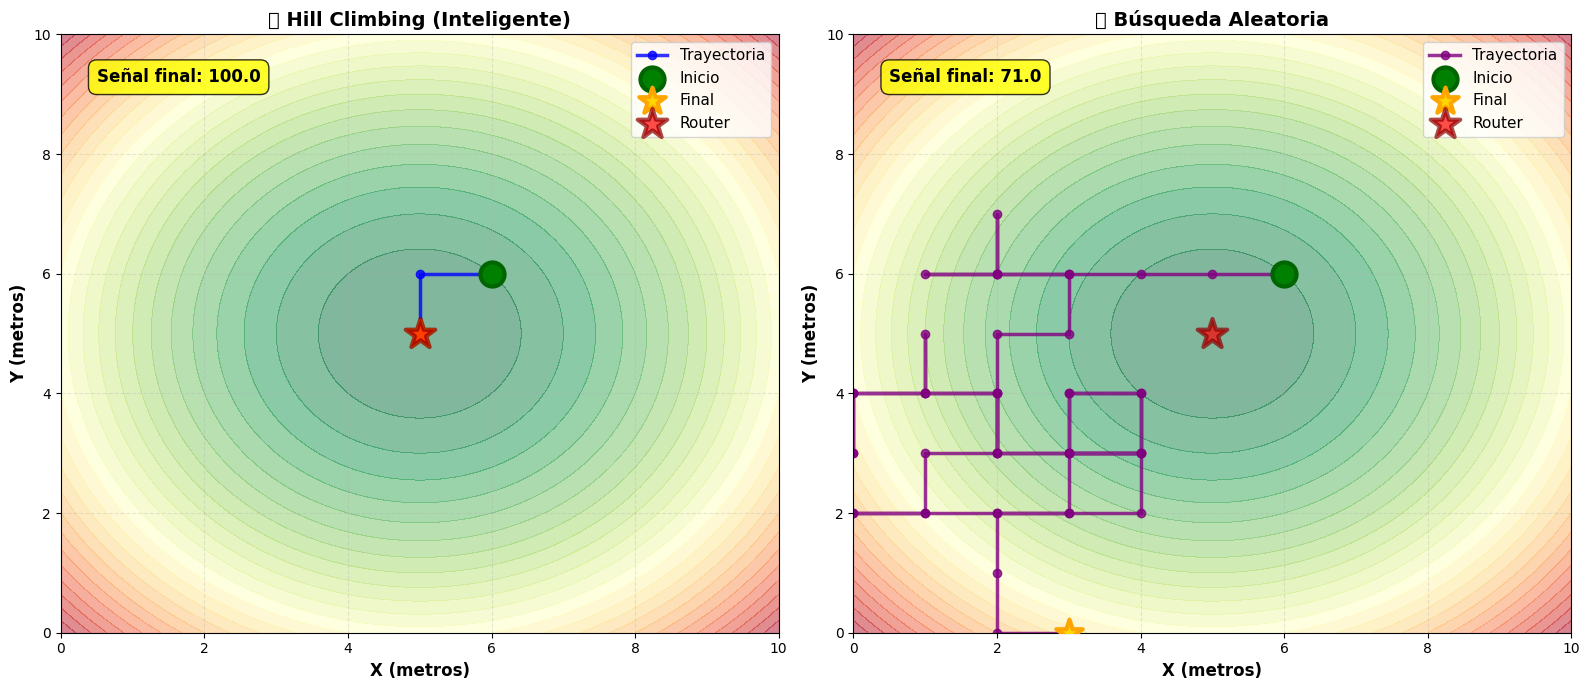


💡 CONCLUSIÓN:
   Hill Climbing es MUCHO más eficiente que moverse aleatoriamente.
   Siempre se mueve hacia la mejora, mientras que la búsqueda aleatoria
   puede ir en cualquier dirección sin propósito.


In [11]:
# Visualizar comparación
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

for idx, (ax, path, signals, titulo, color) in enumerate([
    (axes[0], path_hc, signals_hc, '🧠 Hill Climbing (Inteligente)', 'blue'),
    (axes[1], path_random, signals_random, '🎲 Búsqueda Aleatoria', 'purple')
]):
    # Mapa de calor
    contour = ax.contourf(X, Y, Z, levels=30, cmap='RdYlGn', alpha=0.5)
    
    # Camino
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'o-', color=color, linewidth=2.5, 
           markersize=6, alpha=0.8, label='Trayectoria')
    
    # Inicio y final
    ax.scatter([path_x[0]], [path_y[0]], color='green', s=300, 
              marker='o', edgecolors='darkgreen', linewidths=3, 
              label='Inicio', zorder=5)
    ax.scatter([path_x[-1]], [path_y[-1]], color='gold', s=400, 
              marker='*', edgecolors='orange', linewidths=3, 
              label='Final', zorder=5)
    
    # Router
    ax.scatter([5], [5], color='red', s=500, marker='*', 
              edgecolors='darkred', linewidths=3, 
              label='Router', zorder=5, alpha=0.7)
    
    ax.set_xlabel('X (metros)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y (metros)', fontsize=12, fontweight='bold')
    ax.set_title(titulo, fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    
    # Mostrar señal final
    ax.text(0.5, 9.2, f'Señal final: {signals[-1]:.1f}', 
           fontsize=12, fontweight='bold', 
           bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n💡 CONCLUSIÓN:")
print("   Hill Climbing es MUCHO más eficiente que moverse aleatoriamente.")
print("   Siempre se mueve hacia la mejora, mientras que la búsqueda aleatoria")
print("   puede ir en cualquier dirección sin propósito.")

---

## 🎓 Conclusiones y Lecciones Aprendidas

### ✅ ¿Qué aprendimos en este ejercicio?

#### 1️⃣ **Hill Climbing en 2 Dimensiones**

- 🗺️ Funciona perfectamente en espacios bidimensionales (x, y)
- 🧭 Explora 4 direcciones: arriba, abajo, izquierda, derecha
- 🎯 Encuentra el máximo de señal Wi-Fi eficientemente

**Ventajas demostradas:**
- Simple de implementar incluso en 2D
- Rápida convergencia (pocos pasos)
- Mucho mejor que búsqueda aleatoria
- Aplicable a problemas reales del mundo

---

### 2️⃣ **Aplicación Práctica Real**

Este problema simula situaciones reales:
- 📶 Encontrar mejor señal Wi-Fi
- 🌡️ Buscar zona más cálida/fría en una habitación
- 💡 Encontrar punto con mejor iluminación
- 📻 Ubicar fuente de sonido/radio

---

### 🚀 Fortalezas de Hill Climbing en 2D

| Fortaleza | Descripción |
|-----------|-------------|
| 🟢 **Eficiencia espacial** | No necesita explorar toda la habitación |
| ⚡ **Rapidez** | Encuentra el máximo en pocos pasos |
| 🎯 **Precisión** | Llega exactamente al router (máximo global) |
| 🧭 **Direccionalidad** | Siempre se mueve hacia la mejora |
| 💾 **Memoria mínima** | Solo necesita recordar posición actual |

---

### ⚠️ Consideraciones Importantes

#### ¿Cuándo funciona bien?

✅ **Este ejercicio es ideal** porque:
- Hay **un solo máximo global** (el router)
- La señal **aumenta gradualmente** hacia el router
- No hay **obstáculos** que bloqueen la señal
- El espacio es **continuo y suave**

#### ⚠️ Limitaciones a considerar:

En la vida real, Hill Climbing podría fallar si:
1. **Múltiples routers** → Podría quedar atrapado en el router más cercano (máximo local)
2. **Paredes gruesas** → Podrían crear "valles" en la señal
3. **Interferencias** → Podrían crear máximos locales falsos

---

### 📊 Comparación con Búsqueda Aleatoria

| Aspecto | Hill Climbing | Búsqueda Aleatoria |
|---------|---------------|--------------------|
| **Dirección** | Hacia la mejora | Sin dirección |
| **Eficiencia** | Alta | Baja |
| **Pasos necesarios** | Pocos (~10-20) | Muchos (~50+) |
| **Garantía** | Encuentra máximo local | Sin garantía |
| **Uso de información** | Usa la señal para decidir | Ignora la señal |

---

### 🔑 Conceptos Clave Aprendidos

| Concepto | Explicación |
|----------|-------------|
| **Búsqueda en 2D** | Explorar un espacio bidimensional (x, y) |
| **Vecindad en grid** | 4 direcciones: ↑ ↓ ← → |
| **Función de señal** | Modelo matemático de intensidad Wi-Fi |
| **Convergencia** | Detenerse cuando no hay mejora |
| **Máximo global** | El mejor punto en todo el espacio |

---

### 🎯 Analogía Final

> **Hill Climbing es como caminar en la niebla con un detector:**  
> - No ves el destino (router)  
> - Pero tienes un detector (señal Wi-Fi)  
> - Siempre te mueves donde el detector es más fuerte  
> - Eventualmente llegas al origen de la señal  

---

### 🔗 Extensiones Posibles

Si quieres mejorar este algoritmo:

1. **Movimientos diagonales** - Permitir 8 direcciones en lugar de 4
2. **Múltiples routers** - Simular ambiente con varios máximos locales
3. **Obstáculos (paredes)** - Añadir zonas donde la señal cae bruscamente
4. **Simulated Annealing** - Permitir movimientos "malos" ocasionalmente
5. **Tabu Search** - Evitar regresar a posiciones ya visitadas

---

### 📚 ¿Cuándo usar Hill Climbing en 2D?

#### ✅ **SÍ usar cuando:**
- Tienes un espacio de búsqueda **bidimensional**
- Hay **un máximo dominante** (o máximos bien separados)
- Puedes **evaluar** la función objetivo fácilmente
- Necesitas una **solución rápida** y simple

#### ❌ **NO usar cuando:**
- Hay **muchos máximos locales cercanos**
- El espacio tiene **discontinuidades** (paredes, obstáculos)
- Necesitas **garantizar** el óptimo global
- La función objetivo tiene mucho **ruido**

---

## 🎉 ¡Felicidades!

Has completado exitosamente el ejercicio de **búsqueda de señal Wi-Fi con Hill Climbing**.

### Ahora sabes:
- ✅ Cómo aplicar Hill Climbing en espacios 2D
- ✅ Cómo modelar problemas del mundo real
- ✅ Cómo visualizar búsquedas en mapas de calor
- ✅ Por qué Hill Climbing es mejor que búsqueda aleatoria
- ✅ Las fortalezas y limitaciones del algoritmo

**¡Sigue explorando algoritmos de optimización! 📶🏔️🚀**

---

### 💡 Reflexión Final

Hill Climbing refleja nuestra **intuición natural**: cuando buscas algo (señal, temperatura, luz), te mueves hacia donde "se siente mejor". Es un algoritmo simple pero poderoso que captura perfectamente esta estrategia humana de optimización. 🧠✨